In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn')
%config InlineBackend.figure_format='retina'

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [66]:
path_excel = r'上海拍牌_数据.xlsx'

In [103]:
with open(path_excel, 'rb') as f:
    df = pd.read_excel(f)
df = df[['拍卖时间', '投放数量', '最低成交价', '平均成交价', '最低成交价截止时间', '投标人数', '警示价']]
df.dropna(axis=0, how='any', inplace=True)
df['最低成交价'] = df['最低成交价'].astype(float)

def f(x):
    i1 = x.find('第')
    i2 = x.find('位')
    return x[i1+1:i2]
df['第X位'] = df['最低成交价截止时间'].map(f)
df['最低成交价截止时间'] = df['最低成交价截止时间'].map(lambda x: datetime.strptime(x[:8], '%H:%M:%S'))
df['中标率'] = df['投放数量'] / df['投标人数'] * 100
df

,拍卖时间,投放数量,最低成交价,平均成交价,最低成交价截止时间,投标人数,警示价,第X位,中标率
0,2019-01-01 00:00:00,12832.0,89500.0,89565.0,1900-01-01 11:29:58,168614.0,88100.0,1191,7.610281
1,2019-02-01 00:00:00,8998.0,89400.0,89485.0,1900-01-01 11:29:57,163571.0,88100.0,4146,5.500975
2,2019-03-01 00:00:00,9020.0,89300.0,89348.0,1900-01-01 11:29:58,150523.0,88100.0,2389,5.992440
3,2019-04-01 00:00:00,9445.0,89700.0,89797.0,1900-01-01 11:29:57,169377.0,88100.0,1805,5.576318
4,2019-05-01 00:00:00,9626.0,89600.0,89633.0,1900-01-01 11:29:59,170794.0,88100.0,3444,5.636029
5,2019-06-01 00:00:00,9767.0,89600.0,89695.0,1900-01-01 11:29:57,164086.0,88100.0,2226,5.952366
6,2019-07-01 00:00:00,9200.0,90000.0,90119.0,1900-01-01 11:29:56,164085.0,88100.0,853,5.606850
7,2019-08-01 00:00:00,9249.0,89300.0,89408.0,1900-01-01 11:29:57,162756.0,88100.0,3085,5.682740
8,2019-09-01 00:00:00,8920.0,89600.0,89637.0,1900-01-01 11:29:59,149507.0,88100.0,1557,5.966276
9,2019-10-01 00:00:00,9093.0,89300.0,89376.0,1900-01-01 11:29:54,148324.0,88100.0,337,6.130498


* 特征构造

[Text(0,0.5,'成交价'), Text(0.5,0,'投标人数')]

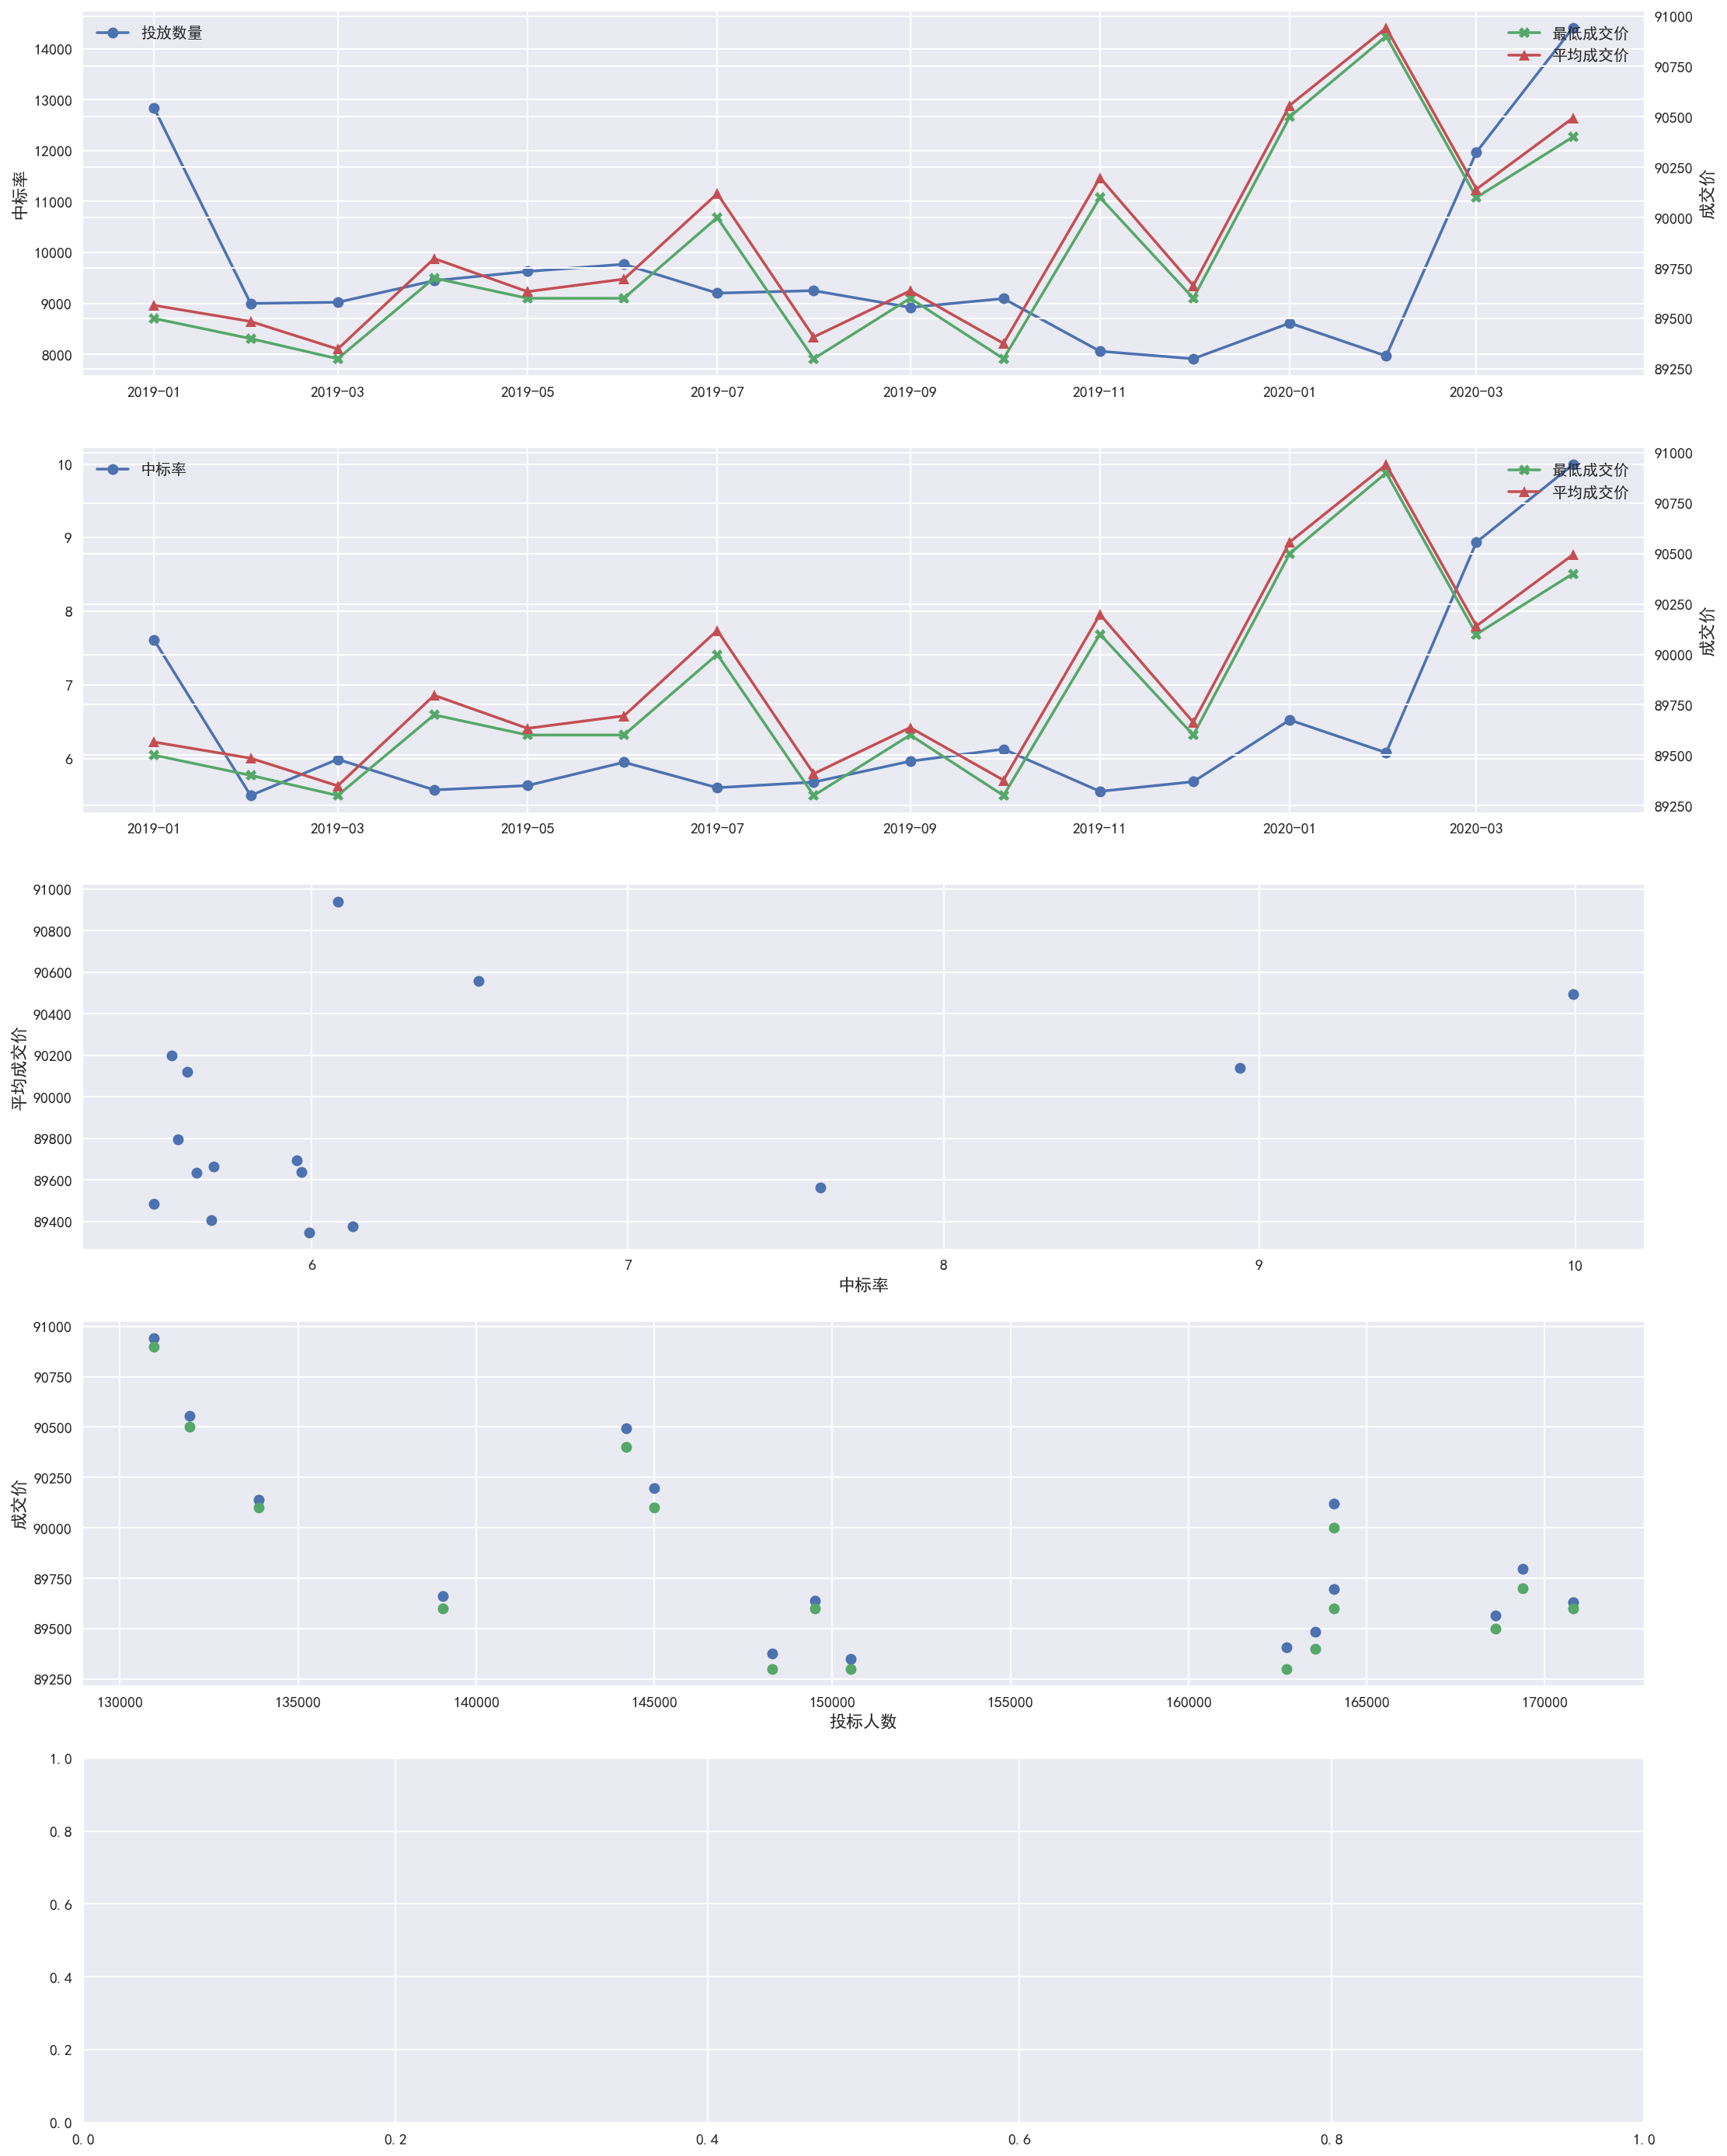

In [102]:
fig, axs = plt.subplots(5, 1, figsize=(18, 25))
axs = axs.flatten()

axs[0].plot(df['拍卖时间'], df['投放数量'], '-o', label='投放数量')
temp = axs[0].set(ylabel='投放数量')
axs[0].legend(loc='upper left')
ax_y2 = axs[0].twinx()
ax_y2.plot(df['拍卖时间'], df['最低成交价'], '-X', label='最低成交价', c='C1')
ax_y2.plot(df['拍卖时间'], df['平均成交价'], '-^', label='平均成交价', c='C2')
ax_y2.legend(loc='upper right')
temp = ax_y2.set(ylabel='成交价')

axs[1].plot(df['拍卖时间'], df['中标率'], '-o', label='中标率')
temp = axs[0].set(ylabel='中标率')
axs[1].legend(loc='upper left')
ax_y2 = axs[1].twinx()
ax_y2.plot(df['拍卖时间'], df['最低成交价'], '-X', label='最低成交价', c='C1')
ax_y2.plot(df['拍卖时间'], df['平均成交价'], '-^', label='平均成交价', c='C2')
ax_y2.legend(loc='upper right')
temp = ax_y2.set(ylabel='成交价')

axs[2].plot(df['中标率'], df['平均成交价'], 'o', label='平均成交价')
axs[2].set(xlabel='中标率', ylabel='平均成交价')

axs[3].plot(df['投标人数'], df['平均成交价'], 'o', label='平均成交价')
axs[3].plot(df['投标人数'], df['最低成交价'], 'o', label='最低成交价')
axs[3].set(xlabel='投标人数', ylabel='成交价')

In [89]:
axs[0].get_xticks()

array([737060., 737119., 737180., 737241., 737303., 737364., 737425.,
       737485.])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 7 columns):
拍卖时间         16 non-null object
投放数量         16 non-null float64
最低成交价        16 non-null object
平均成交价        16 non-null float64
最低成交价截止时间    16 non-null object
投标人数         16 non-null float64
警示价          16 non-null float64
dtypes: float64(4), object(3)
memory usage: 1.0+ KB


In [54]:
df['最低成交价截止时间'].iloc[0][10:14]

'1191'